In [12]:
# import libraries used during this workshop
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Data collected from red or white wines
We'll use data on wines that has the following variables:

----

1. **fixed acidity**: Most acids in wine are "fixed" or nonvolatile (do not evaporate readily).
2. **volatile acidity**: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
3. **citric acid**: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
4. **residual sugar**: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.
5. **chlorides**: The amount of salt in the wine.
6. **free sulfur dioxide**: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.
7. **quality**: based on sensory data, score between 0 and 10.
8. **density**: The density of water is close to that of water depending on the percent alcohol and sugar content.
9. **pH**: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.
10. **sulphates**: A wine preservative which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.
11. **alcohol**: The percent alcohol content of the wine.
12. **total sulfur dioxide**: Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

----

Which variables should be **responses** or **features**? Sometimes it's not obvious and depends on your interests!

Let's load these data into a Pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) using the `read_csv()` function, which can read a table on your computer are directly from a URL!.

In [13]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# these data are in text tables in which the separation of columns is indicated with a semicolon ";" 
red_df = pd.read_csv(url_red, sep=";")
white_df = pd.read_csv(url_white, sep=";")

Let's do some brief exploratory data analysis to familiarize ourselves with the data.

In [14]:
# DataFrame.head() let's us peek at the first few lines of our data table
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# get more info about our DataFrame
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


What does the full distribution of each feature look like? Does anything stand out?


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'quality'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

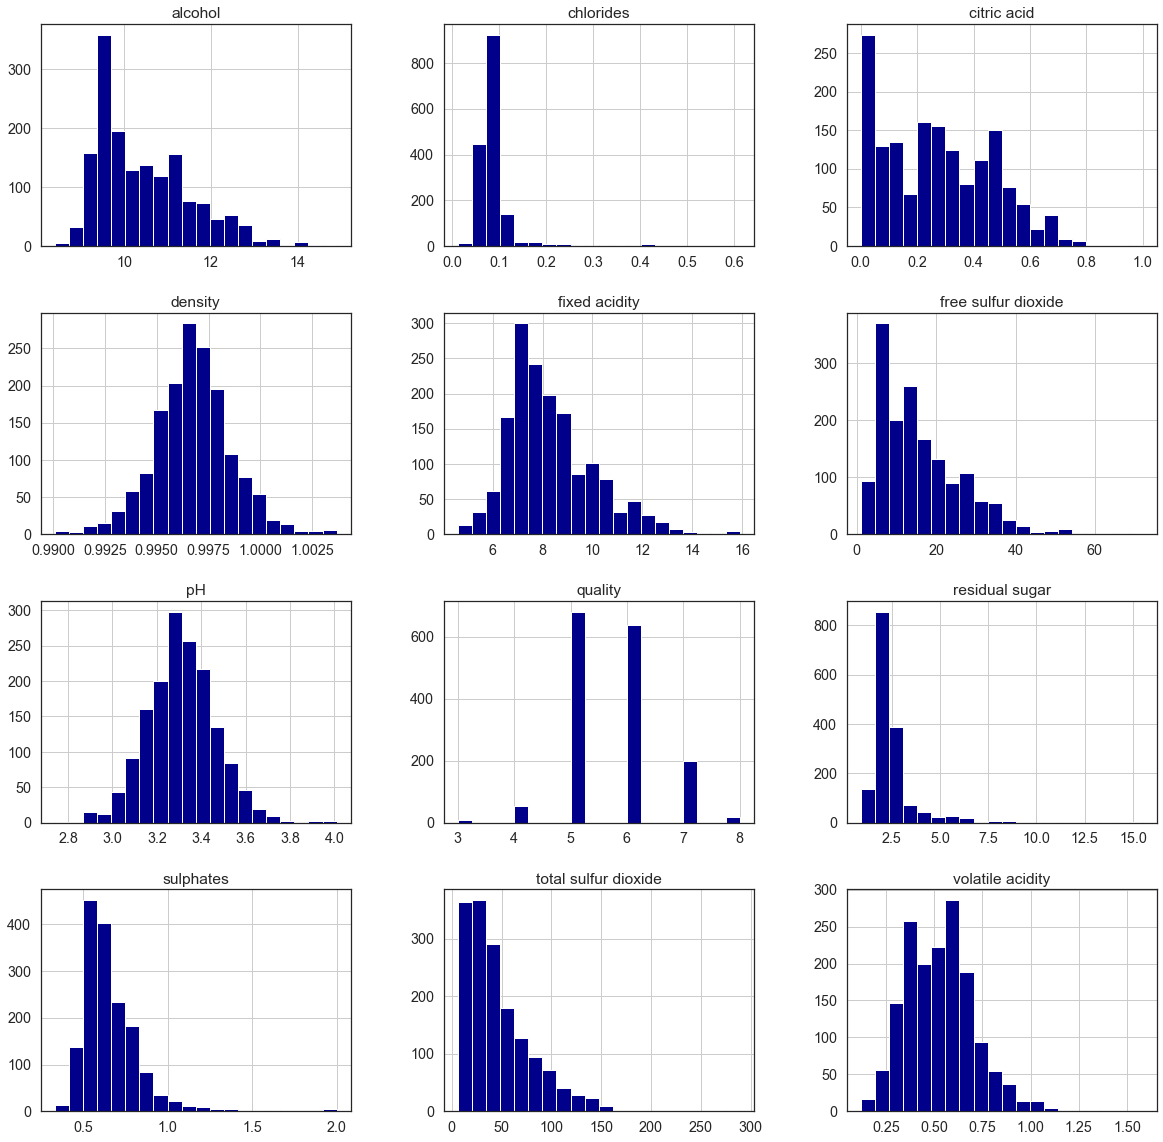

In [16]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})

# as histogram
red_df.hist(bins=20,color='darkblue')

# as boxplot
#red_df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, color='darkblue')

### What about these measurements, if anything, stands out?

In [17]:
# check how many high/low quality wines there actually are
red_df['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# K-Nearest Neighbors (KNN) regression

One should definitely think about their features more, but let's press forward build an ML model to predict **quality**! 

Later, we'll step back and think about how we can improve the model, and in the process demonstrate many common best practices in ML and show how they actually make a difference in model performance. 

These best practices apply to many other ML methods, but we'll use KNN to demonstrate.

We've decided what our features and response are, let's create data tables storing these variables.

In [18]:
# appropriately named data structures make life easy!
response = red_df['quality']
features = red_df.drop(['quality'], axis=1)

Let's use 70% of the data for training and 30% for testing, using `train_test_split` function (detailed description [here](https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2022/05/sklearn-train-test-split_syntax-explanation_v2.png) ).

In the context of KNN on these wine data: we'll use 70% of our data to make **quality** predictions about the other 30% that we held out. We can then compare these predictions to the true values to assess performance!


In [19]:
# Here we will split our features (X) and response (Y) data into 2 categories each: _train and _test
# We change names to X and Yas this is common in scikit learn tutorials and makes code shorter

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.30, random_state=11)
print("X_train dimensions ", X_train.shape)
print("X_test dimensions ", X_test.shape)

X_train dimensions  (1119, 11)
X_test dimensions  (480, 11)


Our data are ready for modeling.

We will 'initialize' our KNN regression model before giving it data by specifying some parameters. We have to make some choices:
1. How many neighbors (*K*) should we use for regression?
2. Of the *K* nearest neighbors, should ones further away be treated the same as those nearby?
    - `uniform`: all neighbors equal
    - `distance`: weight neighbors by inverse of distance from data point
3. How do we measure distance between data points to calculate "nearness"? Let **d** be a vector of differences between a test sample and training sample, one element for each feature
    - `l1`: L1 norm (Manhattan distance), $\sum_{i=1}^{n} |d_i|$
    - `l2`: L2 norm (Euclidean distance), $\sqrt{\sum_{i=1}^{n} d_{i}^2}$


### How would you decide which options to use?

In [20]:
# Initialize kNN; here you could e.g. use one of scikit learn's neural networks
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", metric='l2')

# Give our KNN model the training data for model fitting
knn.fit(X_train, Y_train)

KNeighborsRegressor(metric='l2', n_neighbors=3)

Let's use this model to make predictions with our test data using the `.predict()` function and compare these with the true values. We will store all this information in another DataFrame and plot it to see how we did.

In [21]:
# predict values from the test set, create a DataFrame 
predictions =  knn.predict(X_test)
results = pd.DataFrame.from_dict({"truth" : Y_test, "prediction" : predictions})

results.head()

,truth,prediction
1429,5,6.000000
260,5,5.333333
916,5,5.000000
1141,6,5.333333
1574,6,5.333333


### Using this table, briefly examine how we did. 

Compute the mean absolute value of the differences between the truth and prediction columns. You can use the following functions:
- abs()
- np.mean()

NameError: name 'mean' is not defined

[Text(0.5, 0, 'true value'),
 Text(0, 0.5, 'predicted values'),
 Text(0.5, 1.0, '')]

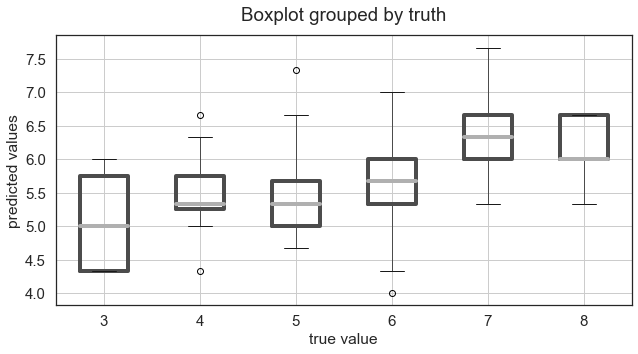

In [ ]:
# my detailed plot of regression performance

# set some variables for creating a plot
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,5)})
p = for_comparison.boxplot(column="prediction", by="truth", fontsize=15, 
                boxprops=dict(linestyle='-', linewidth=4),
                medianprops=dict(linestyle='-', linewidth=4))
p.set(xlabel="true value", ylabel="predicted values", title="")


Scikit-learn has a function to calculate an overall [score](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score:~:text=of%20the%20prediction.-,The%20coefficient%20of%20determination,score%20of%200.0.,-Parameters%3A) called the **coefficient of determination**:

$R = 1-\frac{\sum_{i} (y_i - \hat{y}_i)^2}{\sum_{i} (y_i - \bar{y}_i)^2}$

 
The part on the right divides the sum of squared differences between our predictions ($\hat{y}_i$) and true values ($y_i$) by the sum of squared differences between our predictions and the overall mean ($\bar{y}_i$). This is like comparing our 'fancy' predictions with the simplest predictor possible: assign every new sample the mean value. Smaller values in the numerator are better!

So, this score essentially compares by well we do relative to just using the mean. 

**1 is good, 0 is bad**.

In [ ]:
# score() returns the coefficient of determination of the prediction
# note that our knn object has the training data already stored within it, so we only give it the test data here
print(knn.score(X_test, Y_test))

# or by hand, to show how it's calculated
RSS = ((Y_test - knn.predict(X_test))** 2).sum() 
TSS = ((Y_test - Y_test.mean()) ** 2).sum()
print(1-(RSS/TSS))

0.13110666245214742
0.13110666245214742


At least it's not zero?...

This score was for a single parameterization of the KNN model. We can try other parameterizations as mentioned above:

1. different K values (number of neighbors)
2. different weight functions (`uniform` or `distance`)
3. different distance metrics (`l1` or `l2`)

Experiment with some other parameters using the cell below which re-trains the model and scores it. Do other values make a difference?

In [ ]:
# Initialize, fit, predict
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", metric='l2')
knn.fit(X_train, Y_train)
print(knn.score(X_test, Y_test))


0.13110666245214742


We will tune our model by finding the combination of parameter values that gives us the highest score!

To automate this model tuning, let's put this code for model fitting and scoring into a single function which we can give a list of K values, a weighting function, and distance function. This function will then return a list of scores, one for each value of K.

In [ ]:
def get_scores(x_train, 
                x_test, 
                y_train, 
                y_test, 
                k_values, 
                weight_function, 
                distance_metric):
    """
    input:
        k_values: a list of K nearest neighbors to use
        w: the weight function to use
        m: the distance metric to use
    output:
        a list of scores, one for each set of parameter values
    """
    
    test_scores = []
    for k in k_values:
        # Initialize, fit, predict
        knn = KNeighborsRegressor(n_neighbors=k, weights=weight_function, metric=distance_metric)
        knn.fit(x_train, y_train)
        test_scores.append(knn.score(x_test, y_test))
    return test_scores


Let's give this function a list of K values from 1 to 100. While we're at it, let's also compare the `uniform` and `distance` weighting functions.

Thus, we will train and test 200 KNN models.

[Text(0.5, 0, 'k neighbors'),
 Text(0, 0.5, 'score'),
 Text(0.5, 1.0, 'red:distance, blue:uniform')]

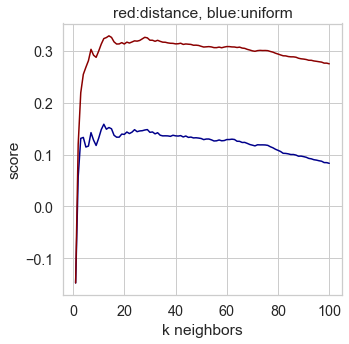

In [ ]:
k_values = [i for i in range(1,101)]

scores_uniform = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "uniform", distance_metric = "l2")
scores_distance = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_uniform, color='darkblue')
sns.lineplot(x=k_values, y=scores_distance, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:distance, blue:uniform")


Let's use "distance" for the **weights** parameter. What about for the **metric** parameter?

In addition to the L2 norm, let's try the L1 norm.

0.373053904037155


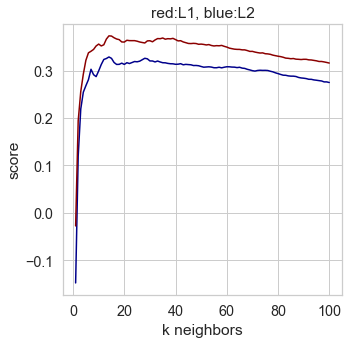

In [ ]:
scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))

Let's use 'l1' for the metric parameter.

By constantly referring to test scores, we are using the data to make decisions about how to parameterize/configure our KNN model.

---

# Feature selection

The success of KNN depends on the fact that samples that are nearby in feature space also have similar response values, such that we can use these KNN reponses for accurate prediction. Stated another way, the values of the features are **correlated** with the reponse values. If this isn't the case, nearby neighbors might have wildly difference reponse values, such that 'nearness' in feature space isn't informative for predicting reponse values, leading to inaccurate predictions!

So far we've used all available features to make predictions, but some of these features may be useless.

At best, including non-informative features makes our model more complex, less interpretable, more computationally costly to use and maintain (we will measure useless features for future data!). This is particularly problematic
for neural networks, in which adding features can dramatically increase the number of parameters.

#### However, non-informative features can ***reduce*** the performance of the model.

Let's try to select only the more informative features by looking at the **Pearson correlation** between all of our variables.

<AxesSubplot:>

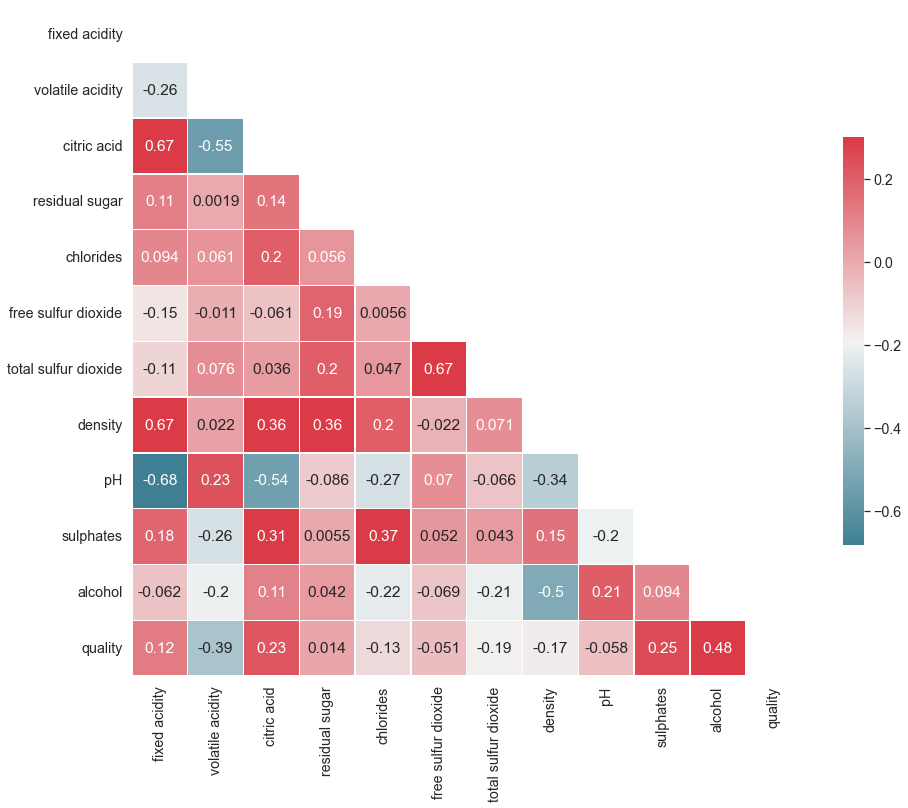

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,15)})
# calculate pearson correlation between each pair of features
pcorr = red_df.corr(method="pearson")

# matrix is symmetric, upper right half same as lower left half
# not necessary, but for viz purposes let's mask the upper right half
mask = np.zeros_like(pcorr)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(pcorr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [ ]:
# another way to qaulitatively inspect the relationships between our variables
# warning: this function takes ~30 sec to run!
#sns.pairplot(red_df)

### How should we look at this plot? Which features should we select?

In [ ]:
# Select features that have at least a +/- 20% correlation with the response. 
# This is an unsophisticated way to conduct feature selection but will do for today!
# Domain expertise of the problem/system is very useful at this stage.

red_df_selection = red_df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality']]
# for white wine
#red_df_selection = red_df[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol', 'quality']]


Let's repeat the same analyses above on this new DataFrame with selected features.

Best score:  0.46431419832790355


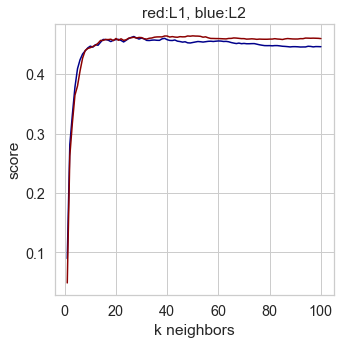

In [ ]:
response = red_df_selection['quality']
features = red_df_selection.drop(['quality'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.30, random_state=11)

scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric ="l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric ="l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))

Feature selection makes a difference in overall predictions! Also, it can potentially affect the performance of other parameters (e.g. ), so feature selection should really be done early on in the ML modeling process, during the exploratory data analysis.

# Feature Normalization

If one feature has a range of values between [0-15] (e.g. alcohol content) and another has a range only between [0-0.5] (e.g. chlorides), then the range of distances between test and training samples will also be different for these two features, such that some features will contribute more/less to the regression/classification!

We fix this by "normalizing" our features such that they are scaled similarly, with similar distributions and ranges.

Let's first use the `DataFrame.describe()` function to get an idea of how the range of each selected feature varies.

In [ ]:
features.describe()

,volatile acidity,citric acid,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.658149,10.422983
std,0.179060,0.194801,0.169507,1.065668
min,0.120000,0.000000,0.330000,8.400000
25%,0.390000,0.090000,0.550000,9.500000
50%,0.520000,0.260000,0.620000,10.200000
75%,0.640000,0.420000,0.730000,11.100000
max,1.580000,1.000000,2.000000,14.900000


"Skewed" distributions can have a similar impact on regression/classification, which we can inspect using `DataFrame.skew()`

In [ ]:
features.skew()

volatile acidity    0.671593
citric acid         0.318337
sulphates           2.428672
alcohol             0.860829
dtype: float64

To normalize, we'll use the standard Z score such that a feature's value will be transformed as $x' = \frac{(x - \mu)}{\sigma}$.

Another option is the min-max normalization $x' = \frac{(x - x_{min})}{x_{max} - x_{min}}$

### Which one do you think we should use?

In [ ]:
# Initiate the scaler
scaler = StandardScaler()
# another option
#scaler = MinMaxScaler()

# Fit/transform to all numeric data
features_transformed = scaler.fit_transform(features)

Let's confirm our features have actually been transformed as expected.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

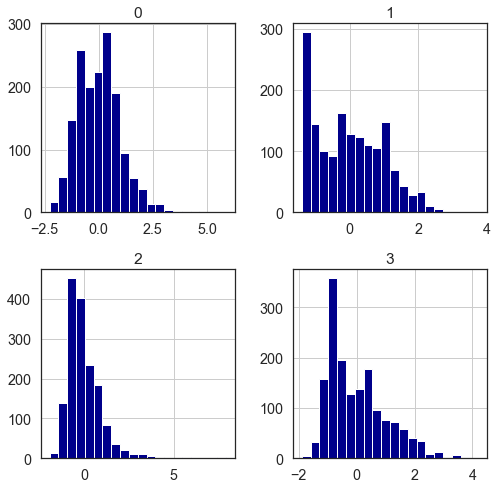

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(8,8)})
pd.DataFrame(features_transformed).hist(bins=20,color='darkblue' )

Let's rerun the regression with the transformed features to see if it increased scores. This is all the same code, except here I'm using the `features_transformed` variable, not `features` as above.

Best score:  0.5007669522105088


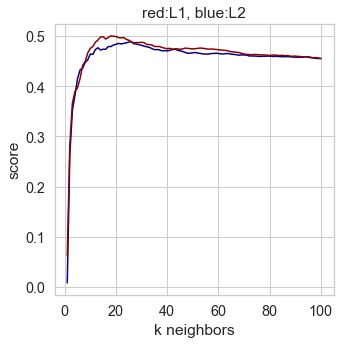

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features_transformed, response, test_size=0.30, random_state=11)

scores_l2 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l2")
scores_l1 = get_scores(X_train, X_test, Y_train, Y_test, k_values, weight_function = "distance", distance_metric = "l1")

sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l2, color='darkblue')
sns.lineplot(x=k_values, y=scores_l1, color='darkred')
p.set(xlabel="k neighbors", ylabel="score", title="red:L1, blue:L2")

print("Best score: ", max(scores_l1))


We get a score of ~0.5 with the L1 norm and using ~15 neighbors! A pretty nice increase from our initial score of ~0.17 above.

Using code from above, we can again visualize the true and predicted values within the test data to get a sense of how well the model is performing.

[Text(0.5, 0, 'true value'),
 Text(0, 0.5, 'predicted values'),
 Text(0.5, 1.0, '')]

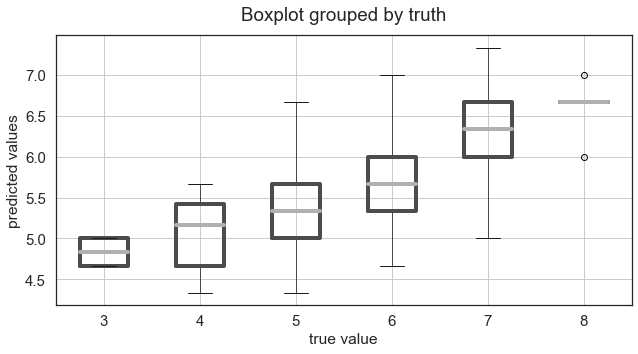

In [ ]:
knn.fit(X_train, Y_train)

tmp = pd.DataFrame.from_dict({"truth" : Y_test, "prediction" : knn.predict(X_test)})
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(10,5)})
p = tmp.boxplot(column="prediction", by="truth", fontsize=15, 
                boxprops=dict(linestyle='-', linewidth=4),
                medianprops=dict(linestyle='-', linewidth=4))
p.set(xlabel="true value", ylabel="predicted values", title="")


Looks like we still systematically overestimate values of bad wines and underestimate values of good wines.

----

----

# K-Nearest Neighbors Classification
Let's take our quality scores and convert them to labels to see if we can classify a wine as "excellent"

In [ ]:
bins = [0, 4, 6, 10]
labels = ["poor", "average", "excellent"]

# create a new 'quality_label' column by binning 'quality' into three categories
red_df_selection.loc[:,'quality_label'] = pd.cut(red_df_selection['quality'], bins=bins, labels=labels)

# we no longer need the 'quality' column
red_df_selection.drop('quality', axis =1, inplace = True)
red_df_selection.head(n=10)

/Users/bjarnold/miniconda/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/bjarnold/miniconda/envs/datascience/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/bjarnold/miniconda/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy

,volatile acidity,citric acid,sulphates,alcohol,quality_label
0,0.70,0.00,0.56,9.4,average
1,0.88,0.00,0.68,9.8,average
2,0.76,0.04,0.65,9.8,average
3,0.28,0.56,0.58,9.8,average
4,0.70,0.00,0.56,9.4,average
5,0.66,0.00,0.56,9.4,average
6,0.60,0.06,0.46,9.4,average
7,0.65,0.00,0.47,10.0,excellent
8,0.58,0.02,0.57,9.5,excellent
9,0.50,0.36,0.80,10.5,average


Do any of our features have information about our quality label? Type a feature into the `y=` argument of the `sns.boxplot` function. Options invlude those in the header we just printed above!

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(5,5)})
sns.boxplot(x='quality_label',y='', data=red_df_selection)

ValueError: Could not interpret input ''

Here, I'm taking all the code from above and condensing it into one cell to see how classification performance changes with the number of K neighbors used.

We will usescikit-learn's `KNeighborsClassifier` instead of `KNeighborsRegressor`.

Best score:  0.8854166666666666


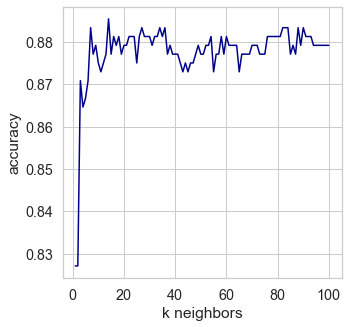

In [ ]:
response = red_df_selection['quality_label']
features = red_df_selection.drop(['quality_label'], axis=1)

# feature normalization
scaler = StandardScaler()
features_transformed = scaler.fit_transform(features)

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(features_transformed, response, test_size=0.30, random_state=11)

# create function to test the KNN classifier across a range of K values
# note that this uses the 'accuracy_score' for classification, instead of 'score' as used above for regression
# the 'accuracy_score' is simply the fraction of correct predictions
def knn_classification_iterate(x_train, x_test, y_train, y_test, k_values, w, m):
    test_scores = []
    # For each k
    for k in k_values:
        # Initialize, fit, predict
        knn = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
        knn.fit(x_train, y_train)
        pred_knn = knn.predict(x_test)
        accuracy_score(y_test, pred_knn)
        test_scores.append(accuracy_score(Y_test, pred_knn))
    return test_scores

# Use the above function
# note with KNN we may have ties, i.e. a test sample's 3 nearest neighbors are a poor, average, and excellent wine
# 'breaking' these ties is a bit arbitrary, we will ignore this for now but in practice you should consider this!
scores_l1 = knn_classification_iterate(X_train, X_test, Y_train, Y_test, k_values, w = "distance", m="l1")

# plot accuracy score results
sns.set(style='whitegrid',font_scale=1.3, rc={'figure.figsize':(5,5)})
p = sns.lineplot(x=k_values, y=scores_l1, color='darkblue')
p.set(xlabel="k neighbors", ylabel="accuracy", title="")

print("Best score: ", max(scores_l1))


Greater than 88% accuracy looks nice!

However, this is a little misleading. For instance, let's revisit the distribution of quality scores in our data set.

In [ ]:
red_df_selection['quality_label'].value_counts(normalize=True)
Y_test.value_counts()

average      395
excellent     65
poor          20
Name: quality_label, dtype: int64

**Most** of our wines are 'average', such we could build a model without any features, labelling every single new sample as 'average', and our accuracy would be $\frac{395}{395+65+20} = 0.823$

Our accuracy scores of ~0.88 are certainly better, but this extremely simple approach already get us most of the way there...


Alternatively, say we are very interested in predicting 'excellent' wines and we are concerned about our 'excellent' predictions being accurate. The simple approach would be label each new wine as excellent, which would create a bad model with $\frac{65}{395+65+20} = 0.135$ accuracy. How does the accuracy our our 'excellent' predictions compare to this?

Let's create a [**confusion matrix**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), where rows are the true labels and columns are the predicted labels.

In [ ]:
# make a classifier that's optimized according to our results above, with k=18 neighbors
knn = KNeighborsClassifier(n_neighbors=18, weights='distance', metric='l1')
knn.fit(X_train, Y_train)
pred_knn_for_best_k = knn.predict(X_test)

# give confusion_matrix true values and predicted values to make a table
cm = confusion_matrix(Y_test, pred_knn_for_best_k)

# print the matrix
names = ["average", "excellent", "poor"]
print(pd.DataFrame(cm, index=names, columns=names))
# rows are true labels, columns are predicted labels?

           average  excellent  poor
average        383         12     0
excellent       26         39     0
poor            19          0     1


The accuracy we calculated above divides the sum of all the entries in the diagonal of this matrix (true positives) by all entries in the matrix (true positives and false positives).

In [ ]:
diagonal = (383+39+1)
all = (383+39+1+12+26+19)

diagonal/all

0.88125

Of our $39+12=51$ excellent predictions (sum of entries in the 'excellent' column), $\frac{39}{51} = 0.76$ are correct, which is much better than ~$13$% from randomly guessing based on the proportion of excellent wines in the training data. Note that we missed 26 'excellent' wines that our classifier throught were 'average'.

These concepts are known as **specificity** and **recall**, and will be covered in more detail later in the workshop.